In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean seaborn theme
sns.set(style="whitegrid")


In [6]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')


In [7]:
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
data['Survived'].value_counts()


,count
Survived,
0,549
1,342


In [11]:
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
data.drop('Cabin' ,axis=1,inplace=True)

In [15]:
data['Age'] = data['Age'].fillna(data['Age'].median())



In [17]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])



In [18]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [19]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [20]:
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X = data.drop('Survived', axis=1)  # All columns except Survived
y = data['Survived']               # The column we want to predict


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression


In [25]:
model = LogisticRegression(max_iter=200)


In [26]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [27]:
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7988826815642458


In [30]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [31]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[89 16]
 [20 54]]


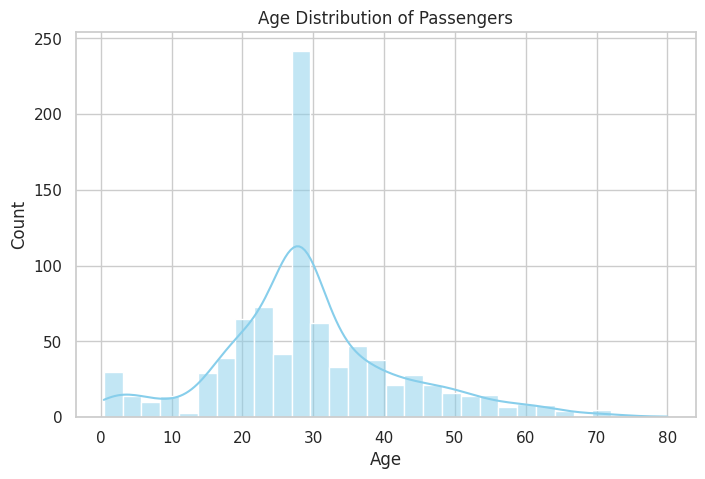

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


<ipython-input-34-c0d614e55f02>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='pastel')


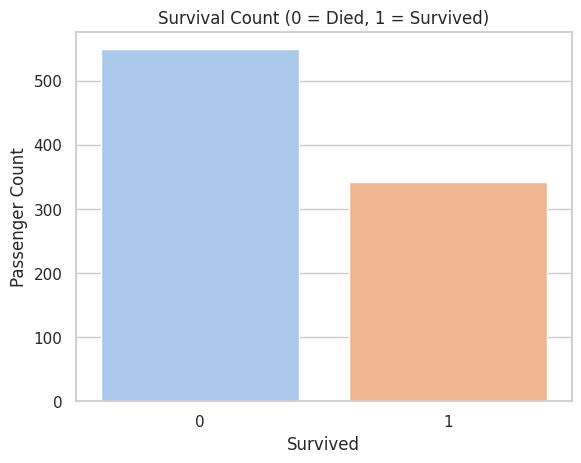

In [34]:
sns.countplot(x='Survived', data=data, palette='pastel')
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.show()


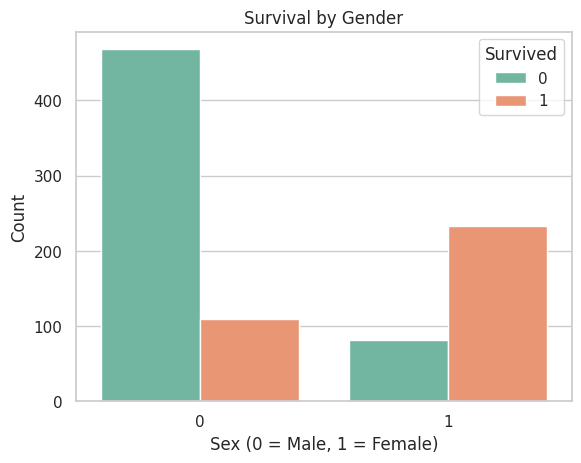

In [35]:
sns.countplot(x='Sex', hue='Survived', data=data, palette='Set2')
plt.title('Survival by Gender')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


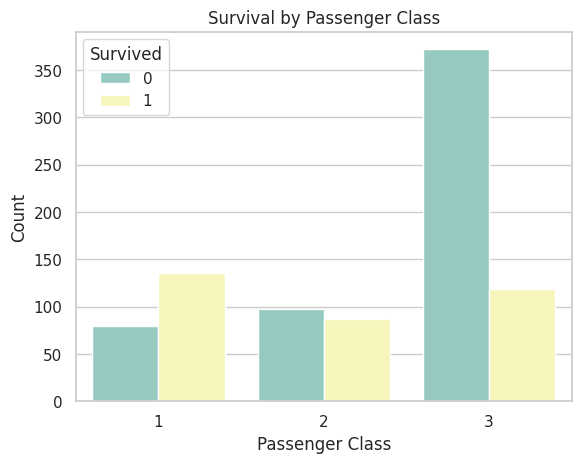

In [36]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='Set3')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


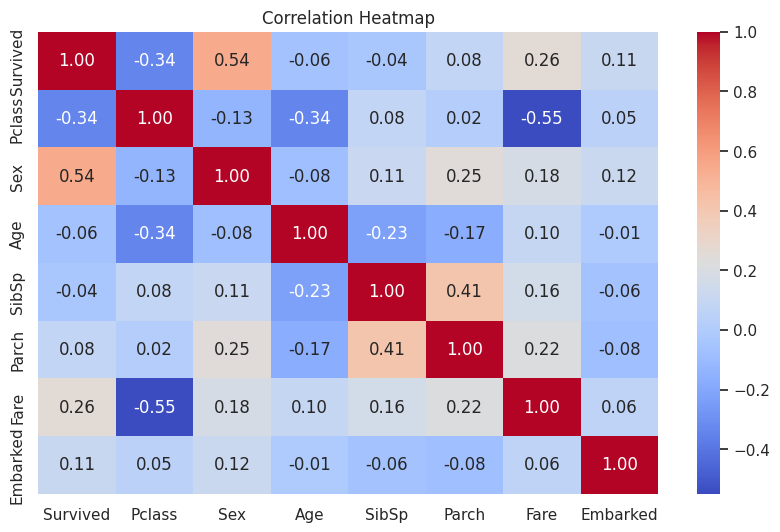

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
